# Correction exercises 05: my data is wrong (sometimes)

In [1]:
# imports and defaults
import pandas as pd  
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 14
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

### Exercise 1: shortwave radiation

**Plot hourly SWIN and SWOUT on the same plot for the entire data period. Discuss the features of the plot (periodicity, maxima, minima...). Can you determine at first sight with season is cloudier than others? Or when approximately we have a snow cover, and ice cover?**

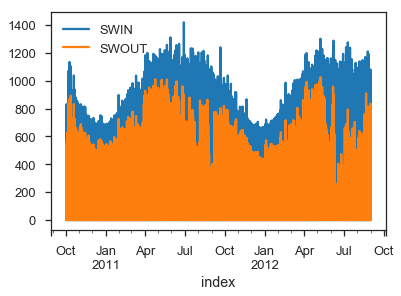

In [2]:
# read the data
df = pd.read_csv('data_Zhadang_localtime.csv', index_col=0, parse_dates=True)
df[['SWIN', 'SWOUT']].plot();

**Make a scatterplot of SWIN versus SWOUT. What features can you describe?**

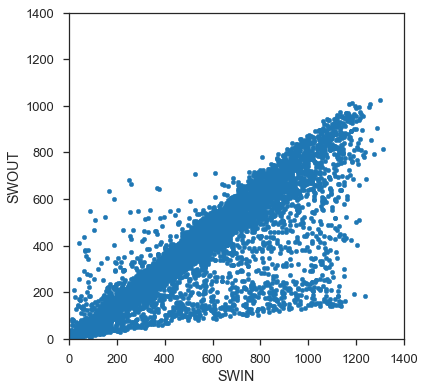

In [3]:
f, ax = plt.subplots(figsize=(6, 6));
df.plot(ax=ax, kind='scatter', x='SWIN', y='SWOUT');
ax.set_xlim([0, 1400]);
ax.set_ylim([0, 1400]);

**Make a new dataframe (dfchris) which is a subset of the data for the Christmas Eve of 2011. Plot SWIN and SWOUT on the same plot. Christmas Eve was a nice, cold and sunny day at Zhadang. Can you see the features at the beginning and the end of the day? Can you determine what this is?**

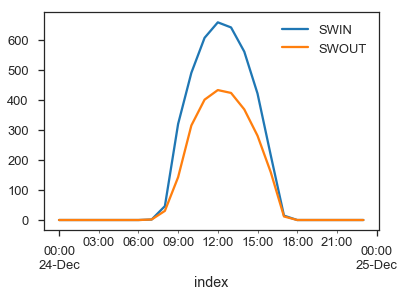

In [4]:
dfchris = df.loc['2011-12-24'].copy()
dfchris[['SWIN', 'SWOUT']].plot();

**Compute the hourly albedo for this same Christmas day and add it to the dfchris dataframe. Since dividing by zero is never a good idea, I suggest to replace the invalid values with np.NaN. This can be done after the computation by using np.where(). Plot it and discuss. What could be the reasons for this?**

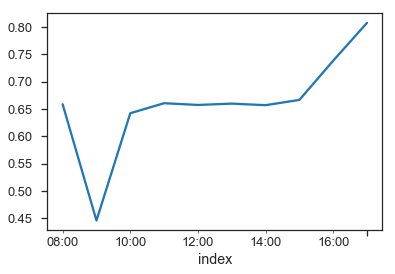

In [5]:
dfchris['ALBEDO'] = dfchris['SWOUT'] / dfchris['SWIN']
dfchris['ALBEDO'] = np.where(dfchris.SWOUT > 5, dfchris['ALBEDO'], np.NaN)
dfchris['ALBEDO'].plot();

**Now define a new variable (HOURLYALB) in the originial dataframe. Mask the invalid values with np.NaN like we did before. Plot the average daily cycle of HOURLYALB for the months of Mai, June, and July. Discuss.**

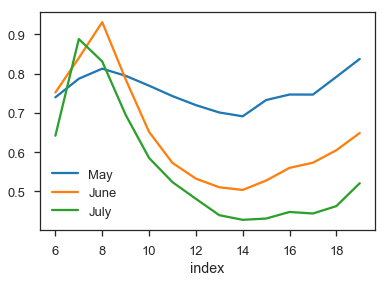

In [6]:
df['HOURLYALB'] = df['SWOUT'] / df['SWIN']
df['HOURLYALB'] = np.where(df['SWIN'] > 10, df['HOURLYALB'], np.NaN)
dfm = df.loc[df.index.month == 5]['HOURLYALB']
dfm.groupby(dfm.index.hour).mean().plot(label='May');
dfm = df.loc[df.index.month == 6]['HOURLYALB']
dfm.groupby(dfm.index.hour).mean().plot(label='June');
dfm = df.loc[df.index.month == 7]['HOURLYALB']
dfm.groupby(dfm.index.hour).mean().plot(label='July');
plt.legend();

**We leave Chrismas and have a look at the 25th of April, 2012. Again, plot SWIN and SWOUT on that day. Discuss. Plot the meterological conditions during the 5-day period centered on 2012-04-25. Can it explain what you see?**

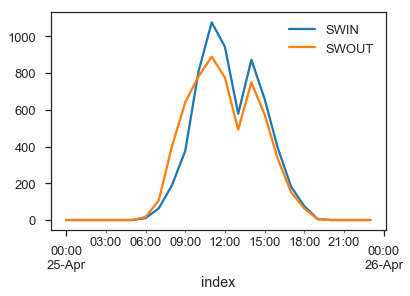

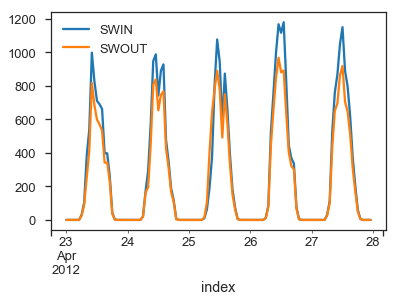

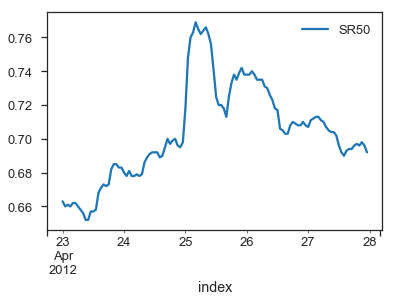

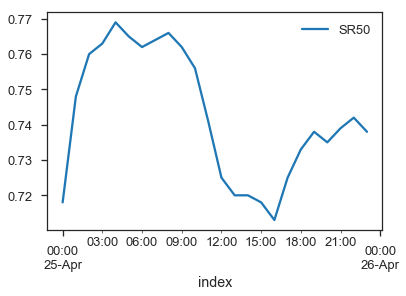

In [21]:
apr25 =df.loc['2012-04-25']
apr25[['SWIN', 'SWOUT']].plot();
fapr = df.loc['2012-04-23':'2012-04-27']
fapr[['SWIN', 'SWOUT']].plot();
fapr[['SR50']].plot();
apr25[['SR50']].plot();

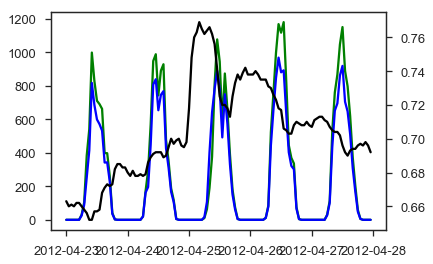

In [25]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(fapr.index, fapr.SWIN, 'g-')
ax1.plot(fapr.index, fapr.SWOUT, 'b-')
ax2.plot(fapr.index, fapr.SR50, 'k-')
#ax2.plot(fapr.index, fapr.HOURLYALB, 'r-')

plt.show()

**Because of all the problems described above, scientists are using a more robust method to compute the albedo: the "daily albedo", much less sensitive to measurement errors and other issues. It is NOT defined as the average of the hourly albedo, but as the ratio of daily amount (sums) of reflected radiation to global radiation. Make a new dataframe containing the daily albedo (at a daily time step then). Plot it. Any issue? Filter it out, or change the range of the plot axis. Discuss.**

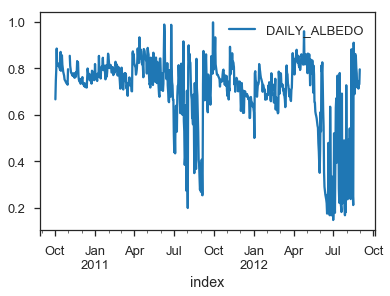

In [8]:
dfd = df[['SWIN', 'SWOUT']].resample('D').sum()
dfd['DAILY_ALBEDO'] = dfd['SWOUT'] / dfd['SWIN']
dfd['DAILY_ALBEDO'] = np.where(dfd.DAILY_ALBEDO > 1, np.NaN, dfd.DAILY_ALBEDO)
dfd[['DAILY_ALBEDO']].plot();

### Exercise 2: longwave radiation

The net-radiation sensor mounted on the AWS at Zhadang is an [NRLITE](http://www.kippzonen.com/Product/31/NR-Lite2-Net-Radiometer#.Vx_mwCaLiBs). It measures the net radiation in visible and infra-red wavelenghts together, which makes it less interpretable. During the night, however, it is guaranteed to measure the longwave budget only.

**Make a new dataframe (DFN) which contains data for the night time only. Plot the net radiation, first as a time series and then as an histogram with a large number of bins (e.g. 100). Discuss. Could you distinguish between cloudy and clear-sky conditions? Which other variable could help you out to find out? Could you come up with an algorithm able to select cloudy nights from clear-sky nights?**

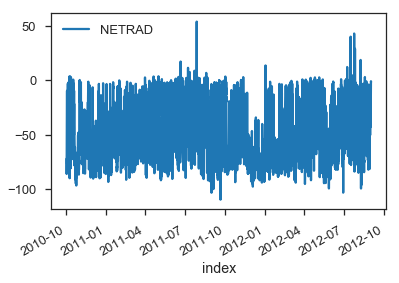

In [9]:
dfn = df.loc[df.SWOUT == 0]
dfn[['NETRAD']].plot();

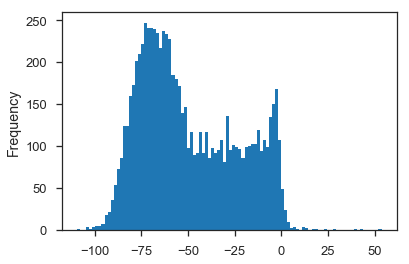

In [10]:
dfn.NETRAD.plot(kind='hist', bins=100);

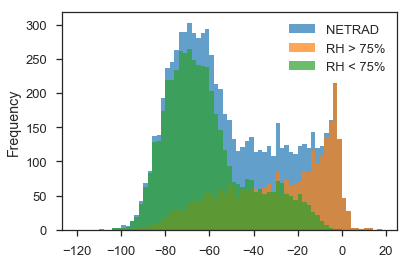

In [11]:
bins = np.arange(70) * 2 - 120
dfn.NETRAD.plot(kind='hist', bins=bins, alpha=0.7);
dfn.loc[df.RH > 75].NETRAD.plot(kind='hist', bins=bins, label='RH > 75%', alpha=0.7);
dfn.loc[df.RH <= 75].NETRAD.plot(kind='hist', bins=bins, label='RH < 75%', alpha=0.7);
plt.legend();

### Exercise 3: wind

**Out of the data, compute the probability that the measured wind-speed over an hour is zero. Plot one of this events where wind-speed is equal to zero for a few hours. Discuss.**

In [12]:
dfw = df.loc[df.WINDSPEED == 0]
print(len(dfw) / len(df))

0.0025595238095238097


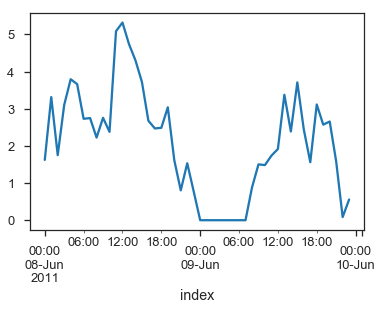

In [13]:
df.loc['2011-06-08':'2011-06-09'].WINDSPEED.plot();

### Bonus question

Measuring precipitation at these altitudes is very challenging. The SR50 sensor (which measures the height of the surface) could be used to identify snowfall events, and even snowfall amounts (in theory).

**Do you have some ideas on how to identify snowfall events with SR50 data?**

In [14]:
# Your answer here